find the most similar map in the dataset

In [1]:
from modelApi.IVFIndex import IVFIndex

ivf = IVFIndex(load_index=True)


/scratch/students/jiaxunliu/.conda/envs/pyljx_2/lib/python3.10/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/scratch/students/jiaxunliu/.conda/envs/pyljx_2/lib/python3.10/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
/scratch/students/jiaxunliu/historical-map/imagebind/models/imagebind_model.py:504: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See htt

datasets division file exsists!


In [ ]:
from pathlib import Path
from IPython.display import Image, display

def print_photo(img_path):
    display(Image(filename=img_path))


def find_map(map_path):
    map_path = Path(map_path)
    display(Image(filename=str(map_path)))
    seg_path = Path('result/segres/') / map_path.relative_to(map_path.parts[0]).with_suffix('')
    res_dict = {}
    for file_path in seg_path.rglob('*.png'):
        if file_path.stem == 'final':
            continue
        my_id = ivf.info_dict[str(file_path)]['id']
        query_res = ivf.query_id(my_id, 1000)
        id_ls = [ele['id'] for ele in query_res if ele['id']!= my_id]
        for id in id_ls:
            if id in res_dict:
                res_dict[id]+=1
            else:
                res_dict[id]=1

    sorted_res_dict = dict(sorted(res_dict.items(), key=lambda item:item[1], reverse=True))
    # similar_seg_file = [ivf.id_info_list[id]['path'] for id in sorted_res_dict.keys()] 
    simialr_map_statistic_dict = {}
    for id, value in sorted_res_dict.items():
        f_path = ivf.id_info_list[id]['path']
        pic_stem = Path(f_path).parent
        if str(pic_stem) in simialr_map_statistic_dict:
            simialr_map_statistic_dict[str(pic_stem)] += value
        else:
            simialr_map_statistic_dict[str(pic_stem)] = value
    sorted_similar_map_statistic_dict = dict(sorted(simialr_map_statistic_dict.items(), key=lambda item:item[1], reverse = True))
    similar_map_path = [str(Path("dataset/") /Path(*Path(fp).parts[-2:]).with_suffix('.jpg')) for fp, value in sorted_similar_map_statistic_dict.items() if value >1 ]
    sim_path_final = [str(Path(fp) / 'final.png') for fp, value in sorted_similar_map_statistic_dict.items() if value >1]
    # print("similar 5 maps:")
    # for imgp in similar_map_path[:5]:
    #     print_photo(imgp)
    return similar_map_path, sorted_similar_map_statistic_dict

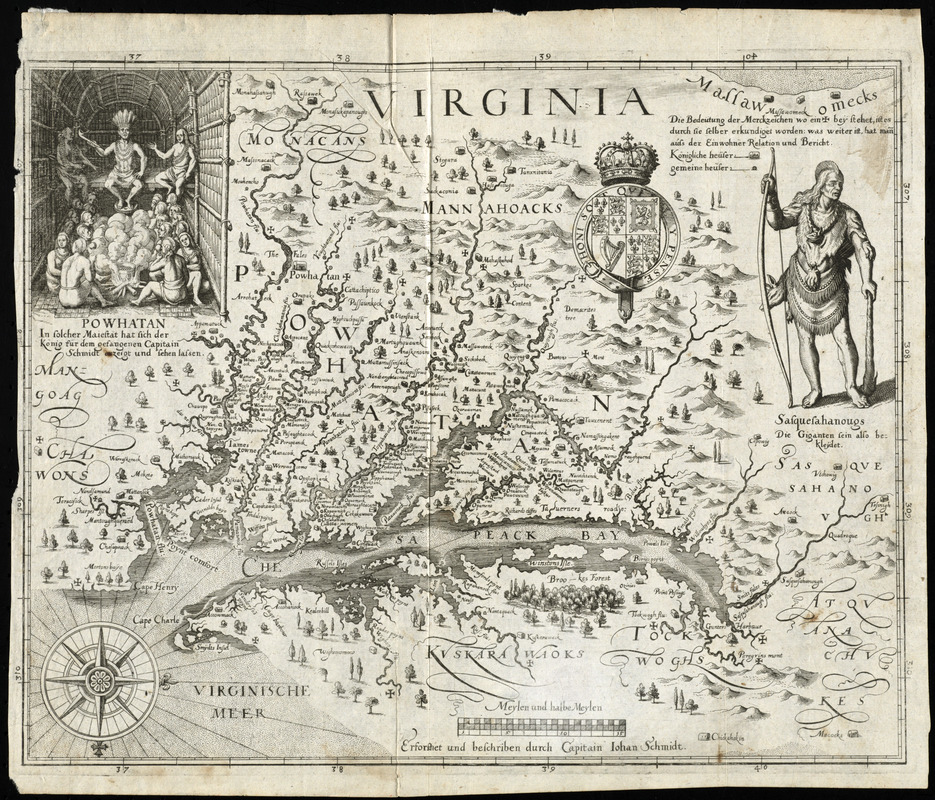

/scratch/students/jiaxunliu/historical-map/modelApi/IVFIndex.py:111: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/native/TensorShape.cpp:3683.)
  similarity =(self.image_embeddings.to(self.device) if on == 'image' else self.text_embeddings.to(self.device)) @ embedding.T


['dataset/Ryhiner-Sammlung/5310_19.jpg', 'dataset/Beinecke Library/3442705.jpg', 'dataset/Ryhiner-Sammlung/2101_58.jpg', 'dataset/Bibliotheque Nationale de France/ark-12148-btv1b55005206v.jpg', 'dataset/Beinecke Library/4165165.jpg', 'dataset/Bibliotheque Nationale de France/ark-12148-btv1b550048918.jpg', 'dataset/Bibliotheque Nationale de France/ark-12148-btv1b55005174g.jpg', 'dataset/Bibliotheque Nationale de France/ark-12148-btv1b53041250m.jpg', 'dataset/Ryhiner-Sammlung/4611_47.jpg', 'dataset/Bibliotheque Nationale de France/ark-12148-btv1b55002961q.jpg', 'dataset/Bibliotheque Nationale de France/ark-12148-btv1b8440464g.jpg', 'dataset/Boston Public Library/3f462s17h.jpg', 'dataset/Ryhiner-Sammlung/3120_33.jpg', 'dataset/Ryhiner-Sammlung/3211_11.jpg', 'dataset/Bibliotheque Nationale de France/ark-12148-btv1b84946886.jpg', 'dataset/Ryhiner-Sammlung/5917_21.jpg', 'dataset/Ryhiner-Sammlung/7701_10.jpg', 'dataset/Beinecke Library/3442349.jpg', 'dataset/Bibliotheque Nationale de France/a

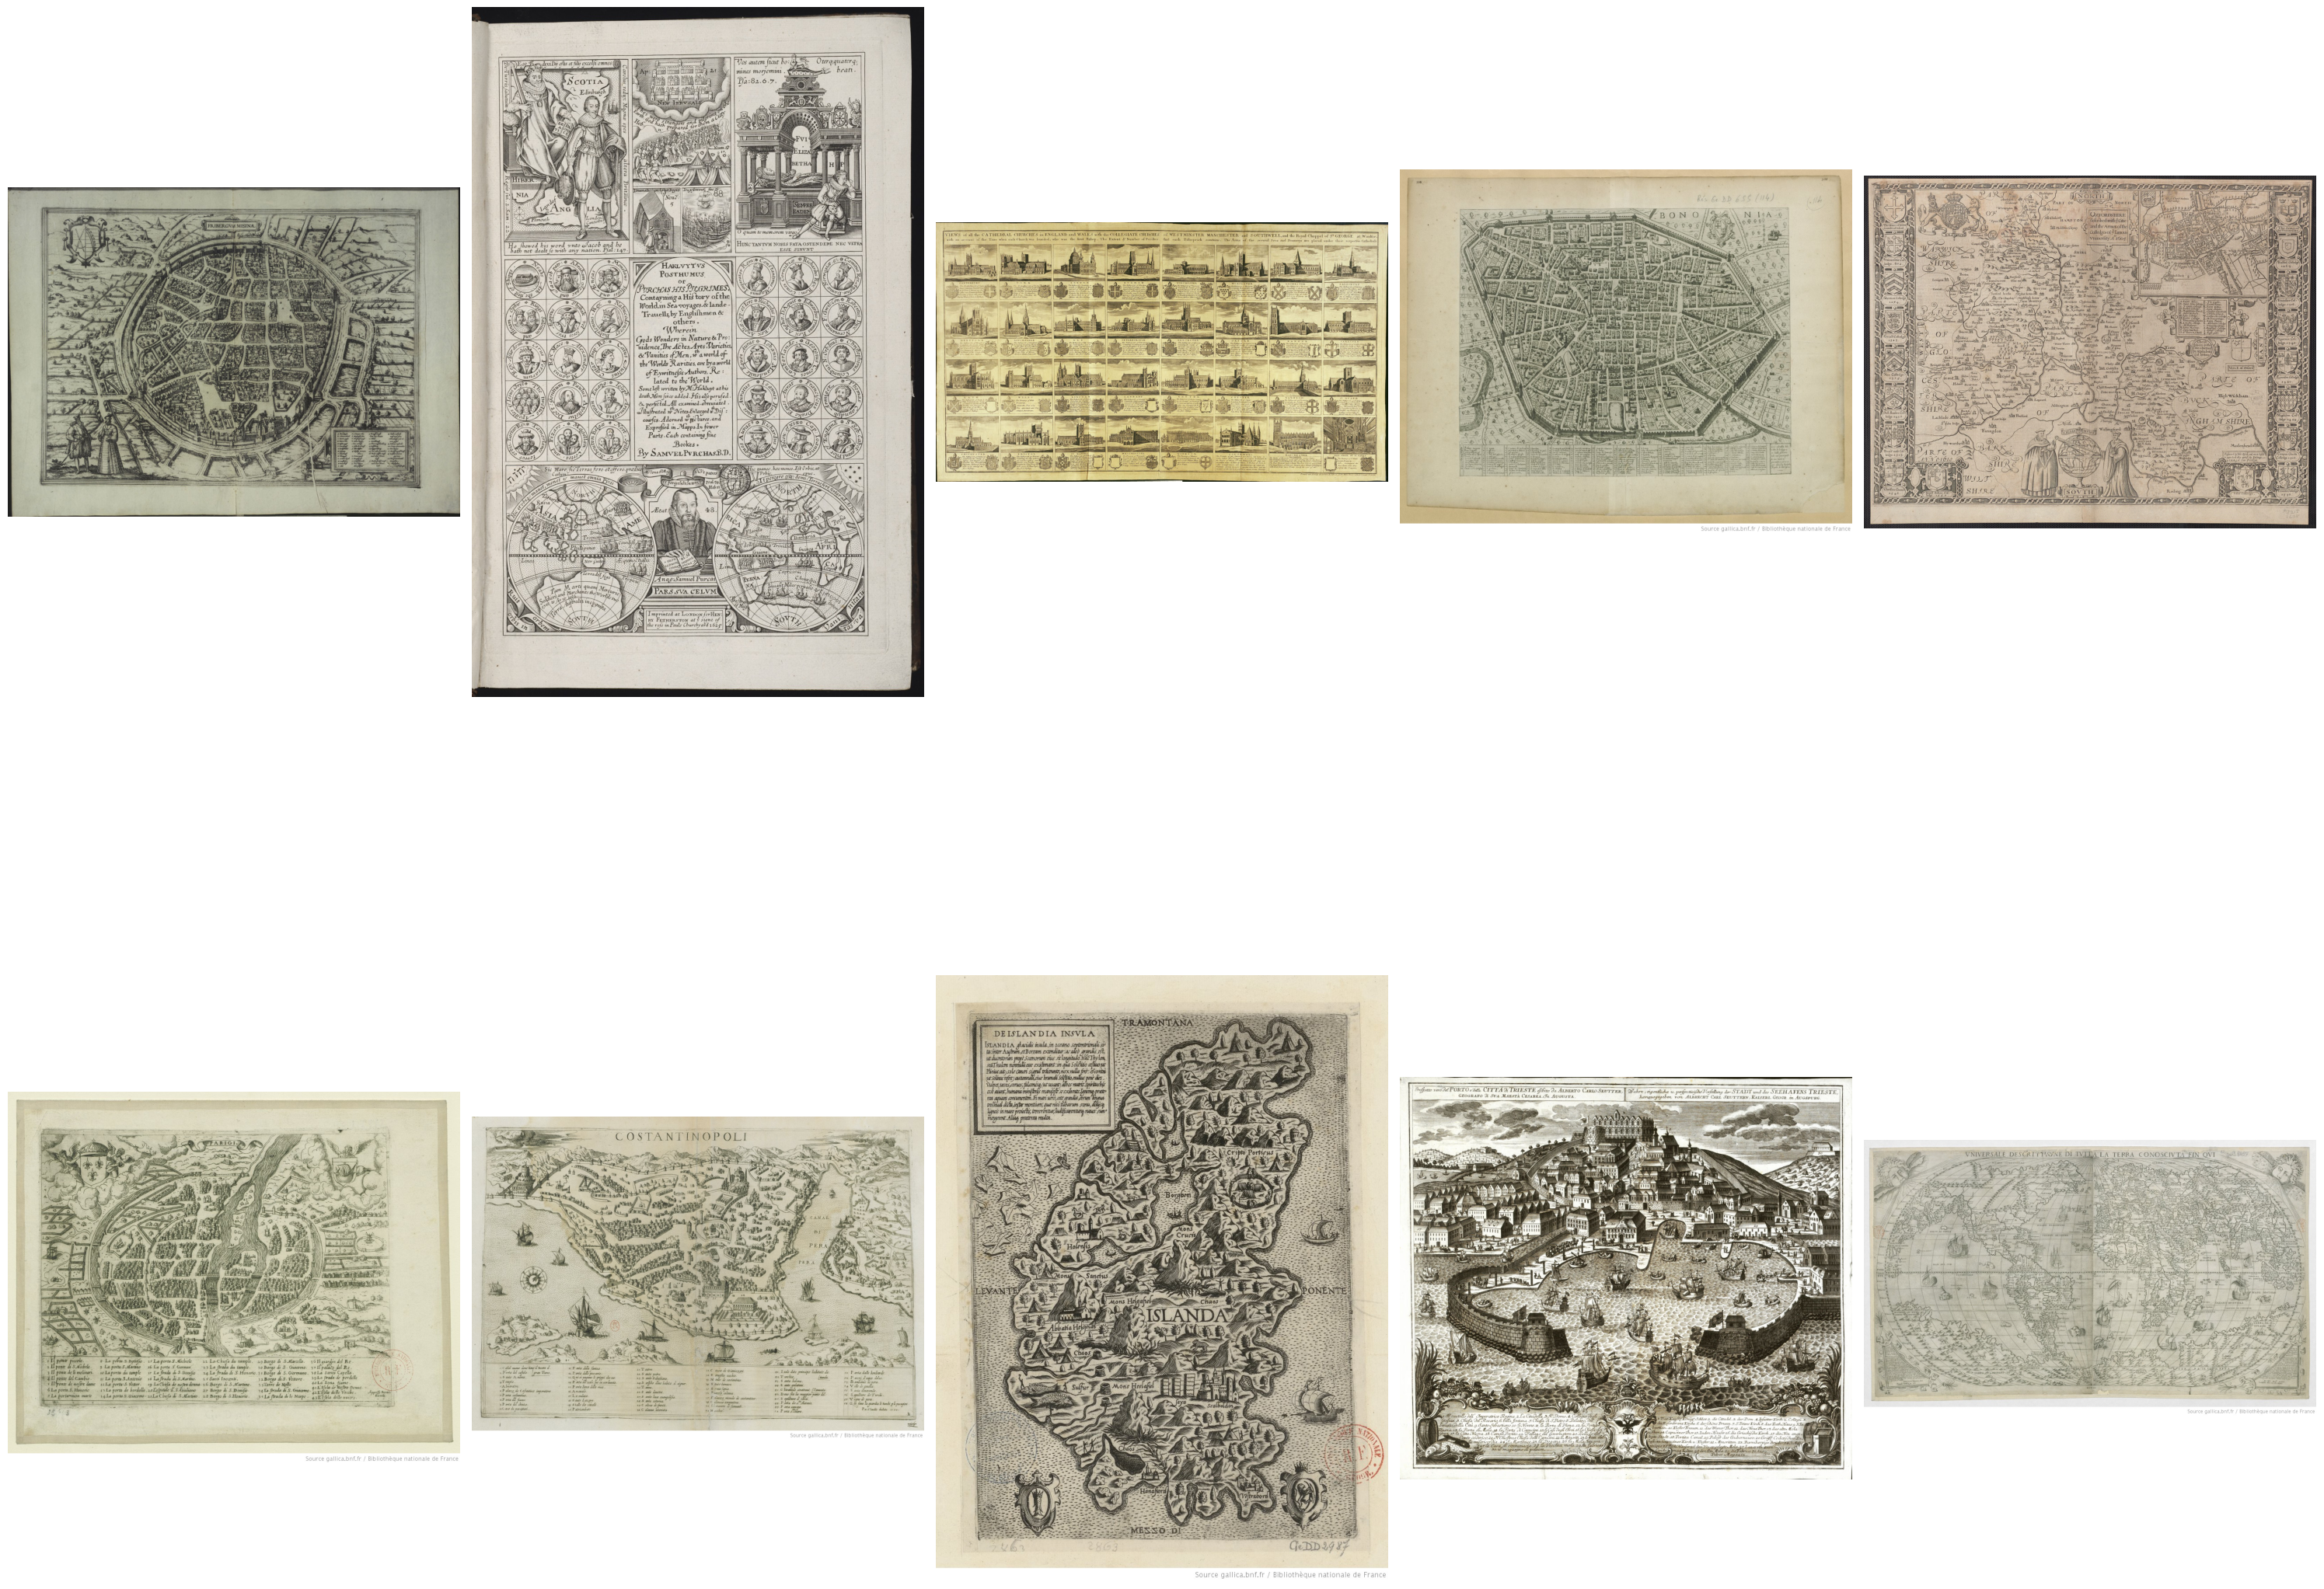

In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_results(img_paths, row_len = 10, figsize=20):
    # 创建一个 n 行 10 列的图形布局
    # row_len = 10
    n = int((len(img_paths)-1)/row_len +1)
    fig, axes = plt.subplots(n, row_len, figsize=(figsize, figsize)) #10置合适的宽高

    # 逐个读取图片并显示
    print(axes)
    for i, img_path in enumerate(img_paths):
        if n == 1:
            now_axes = axes[i%row_len]
        else:
            now_axes = axes[int(i/row_len)][i%row_len]
        img = mpimg.imread(img_path)  # 读取图片
        now_axes.imshow(img)           # 显示图片
        now_axes.axis('off')
    # plt.axis('off')  #
    plt.tight_layout()
    plt.show()

sim_path, sorted_ele = find_map("dataset/Boston Public Library/3f462s76p.jpg")
print(sim_path, sorted_ele)

# from pipeline.utils import show_results

show_results(sim_path[:10], row_len=5, figsize=30)

In [8]:

sim_path, sorted_ele = find_map("dataset/Boston Public Library/3f462s76p/20.png")
print(sim_path, sorted_ele)

[] {}
